In [106]:
from gensim.models import KeyedVectors
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# import sys
# !{sys.executable} -m pip install gensim

In [2]:
path_100_dim = 'word2vec_100_3_polish.bin'
path_300_dim = 'word2vec_300_3_polish.bin'
word2vec_100_dim = KeyedVectors.load(path_100_dim)
word2vec_300_dim = KeyedVectors.load(path_300_dim)

In [17]:
print(type(word2vec_100_dim))

<class 'gensim.models.keyedvectors.Word2VecKeyedVectors'>


In [3]:
#zad 3,4
words = ['kpk', 'szkoda', 'wypadek', 'kolizja', 'nieszczęście', 'rozwód']

def find_top_5_most_similar_words(word_list, dim):
    model = None
    if dim == 100:
        model = word2vec_100_dim
    elif dim == 300:
        model = word2vec_300_dim
    
    out = {}
    for word in word_list:
        top_5 = model.most_similar(word, topn=5)
        out[word] = top_5
    return out

In [4]:
find_top_5_most_similar_words(words, 100)

c:\users\pauli\appdata\local\programs\python\python37\lib\site-packages\gensim\models\keyedvectors.py:2389: RuntimeWarning: invalid value encountered in true_divide
  return (m / dist).astype(REAL)


{'kpk': [('kilopond', 0.6665806770324707),
  ('kpzs', 0.6363496780395508),
  ('kpu', 0.6300562024116516),
  ('sownarkomu', 0.6254925727844238),
  ('wcik', 0.6224358677864075)],
 'szkoda': [('krzywda', 0.6817898750305176),
  ('pożytek', 0.6121943593025208),
  ('strata', 0.5968126654624939),
  ('ryzyko', 0.5745570659637451),
  ('uszczerbek', 0.5639551877975464)],
 'wypadek': [('przypadek', 0.7544811964035034),
  ('okoliczności', 0.7268072366714478),
  ('padku', 0.6788284182548523),
  ('incydent', 0.6418948173522949),
  ('zdarzenie', 0.6114422082901001)],
 'kolizja': [('zderzenie', 0.8431548476219177),
  ('awaria', 0.7090569734573364),
  ('kraksa', 0.6777161359786987),
  ('turbulencja', 0.6613468527793884),
  ('poślizg', 0.6391660571098328)],
 'nieszczęście': [('niebezpieczeństwo', 0.7519958019256592),
  ('cierpienia', 0.7408335208892822),
  ('strapienie', 0.7345459461212158),
  ('cierpienie', 0.7262567281723022),
  ('utrapienie', 0.7251379489898682)],
 'rozwód': [('małżeństwo', 0.7646843

In [5]:
find_top_5_most_similar_words(words, 300)

c:\users\pauli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  del sys.path[0]


{'kpk': [('ksh', 0.5774794220924377),
  ('cywilnego', 0.5498510599136353),
  ('postępowania', 0.5285828113555908),
  ('kilopond', 0.5151568055152893),
  ('kkkw', 0.48344212770462036)],
 'szkoda': [('uszczerbek', 0.6027276515960693),
  ('krzywda', 0.5920778512954712),
  ('strata', 0.550269365310669),
  ('despekt', 0.5382484197616577),
  ('pożytek', 0.531347393989563)],
 'wypadek': [('przypadek', 0.7066895961761475),
  ('okoliczności', 0.6121077537536621),
  ('padku', 0.6056742072105408),
  ('padki', 0.5596078634262085),
  ('incydent', 0.5496981143951416)],
 'kolizja': [('zderzenie', 0.7603178024291992),
  ('awaria', 0.611009955406189),
  ('kraksa', 0.5939033031463623),
  ('turbulencja', 0.5664489269256592),
  ('poślizg', 0.5569967031478882)],
 'nieszczęście': [('utrapienie', 0.6610732674598694),
  ('cierpienia', 0.6526124477386475),
  ('niedola', 0.6478177309036255),
  ('strapienie', 0.6300181150436401),
  ('cierpienie', 0.6248573064804077)],
 'rozwód': [('separacja', 0.7053208351135254

In [23]:
def word_to_vector(model, word):
    return model.wv[word]

In [36]:
expressions = ['sąd najwyższy', 'trybunał konstytucyjny', 'szkoda majątkowy', 'kodeks cywilny', 'sąd rejonowy']

vector_rep_100_dim = {}
vector_rep_300_dim = {}

#change to vector representation
for e in expressions:
    words = e.split(' ')
    l1 = []
    l2 = []
    for w in words:
        l1.append(word_to_vector(word2vec_100_dim, w))
        l2.append(word_to_vector(word2vec_300_dim, w))
    vector_rep_100_dim[e] = l1
    vector_rep_300_dim[e] = l2

c:\users\pauli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [53]:
#zad 5, 6
def find_top_7_most_similar_words(vector_rep, model):
    out = []
    for key, l in vector_rep.items():
        avg_v_rep = np.mean(l, axis=0)
        top_7 = model.similar_by_vector(avg_v_rep, topn=7)
        out.append((key, top_7))
    return out

In [54]:
find_top_7_most_similar_words(vector_rep_100_dim, word2vec_100_dim)

[('sąd najwyższy',
  [('sąd', 0.8644266128540039),
   ('trybunał', 0.7672435641288757),
   ('najwyższy', 0.7527138590812683),
   ('trybunat', 0.6843459010124207),
   ('sędzia', 0.6718415021896362),
   ('areopag', 0.6571060419082642),
   ('sprawiedliwość', 0.6562486886978149)]),
 ('trybunał konstytucyjny',
  [('trybunał', 0.9073251485824585),
   ('konstytucyjny', 0.7998723387718201),
   ('sąd', 0.7972990274429321),
   ('bunał', 0.7729247808456421),
   ('senat', 0.7585273385047913),
   ('bunału', 0.7441976070404053),
   ('trybunat', 0.7347140908241272)]),
 ('szkoda majątkowy',
  [('szkoda', 0.8172438144683838),
   ('majątkowy', 0.7424530386924744),
   ('krzywda', 0.6498408317565918),
   ('świadczenie', 0.6419471502304077),
   ('odszkodowanie', 0.6392182111740112),
   ('dochód', 0.637932538986206),
   ('wydatek', 0.6325603127479553)]),
 ('kodeks cywilny',
  [('kodeks', 0.8756389617919922),
   ('cywilny', 0.8532464504241943),
   ('pasztunwali', 0.6438998579978943),
   ('deksu', 0.637495994

In [55]:
find_top_7_most_similar_words(vector_rep_300_dim, word2vec_300_dim)

c:\users\pauli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  


[('sąd najwyższy',
  [('sąd', 0.8261206150054932),
   ('trybunał', 0.711520791053772),
   ('najwyższy', 0.7068409323692322),
   ('sędzia', 0.6023203730583191),
   ('sądowy', 0.5670486688613892),
   ('trybunat', 0.5525928735733032),
   ('sprawiedliwość', 0.5319530367851257)]),
 ('trybunał konstytucyjny',
  [('trybunał', 0.8845913410186768),
   ('konstytucyjny', 0.7739969491958618),
   ('sąd', 0.7300779819488525),
   ('trybunat', 0.6758428812026978),
   ('senat', 0.6632090210914612),
   ('parlament', 0.6614581346511841),
   ('bunału', 0.6404117941856384)]),
 ('szkoda majątkowy',
  [('szkoda', 0.7971925735473633),
   ('majątkowy', 0.7278684973716736),
   ('uszczerbek', 0.5841633081436157),
   ('korzyść', 0.5474051237106323),
   ('krzywda', 0.5431190729141235),
   ('majątek', 0.525060772895813),
   ('strata', 0.5228629112243652)]),
 ('kodeks cywilny',
  [('kodeks', 0.8212110996246338),
   ('cywilny', 0.7886406779289246),
   ('amiatyński', 0.5660314559936523),
   ('cywilnego', 0.55317401885

In [67]:
#zad 7
expressions2 = ["sąd konstytucja kpk", "pasażer kobieta mężczyzna", "pilot kobieta mężczyzna", "lekarz kobieta mężczyzna",
                "nauczycielka mężczyzna kobieta", "przedszkolanka mężczyzna kobieta", "samochód rzeka droga"]


vector_rep_100_dim2 = {}
vector_rep_300_dim2 = {}

#change to vector representation
for e in expressions2:
    words = e.split(' ')
    l1 = []
    l2 = []
    for w in words:
        l1.append(word_to_vector(word2vec_100_dim, w))
        l2.append(word_to_vector(word2vec_300_dim, w))
    vector_rep_100_dim2[e] = l1
    vector_rep_300_dim2[e] = l2

c:\users\pauli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [71]:
def find_top_5_for_trios(vector_rep, model):
    out = []
    for key, l in vector_rep.items():
        v_rep = l[0] + l[1] - l[2]
        top_7 = model.similar_by_vector(v_rep, topn=5)
        out.append((key, top_7))
    return out


In [72]:
find_top_5_for_trios(vector_rep_100_dim2, word2vec_100_dim)

[('sąd konstytucja kpk',
  [('sąd', 0.8484209775924683),
   ('konstytucja', 0.8322000503540039),
   ('trybunał', 0.7756364345550537),
   ('ustawa', 0.768037736415863),
   ('dekret', 0.7208969593048096)]),
 ('pasażer kobieta mężczyzna',
  [('pasażer', 0.8446224927902222),
   ('pasażerka', 0.722925066947937),
   ('stewardessa', 0.629162073135376),
   ('stewardesa', 0.6267591714859009),
   ('taksówka', 0.6172000765800476)]),
 ('pilot kobieta mężczyzna',
  [('pilot', 0.7940387725830078),
   ('nawigator', 0.6515690088272095),
   ('pilotka', 0.6387545466423035),
   ('oblatywacz', 0.6349523663520813),
   ('stewardesa', 0.6295650005340576)]),
 ('lekarz kobieta mężczyzna',
  [('lekarz', 0.8562706708908081),
   ('lekarka', 0.7652443051338196),
   ('ginekolog', 0.7425668239593506),
   ('pediatra', 0.7326033115386963),
   ('położna', 0.7233613729476929)]),
 ('nauczycielka mężczyzna kobieta',
  [('nauczycielka', 0.7924741506576538),
   ('uczennica', 0.6995393633842468),
   ('nauczyciel', 0.69802421

In [73]:
find_top_5_for_trios(vector_rep_300_dim2, word2vec_300_dim)

c:\users\pauli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  """


[('sąd konstytucja kpk',
  [('sąd', 0.8255324363708496),
   ('konstytucja', 0.798995852470398),
   ('trybunał', 0.7041962146759033),
   ('ustawa', 0.6793721914291382),
   ('dekret', 0.6163084506988525)]),
 ('pasażer kobieta mężczyzna',
  [('pasażer', 0.794208288192749),
   ('pasażerka', 0.6724309325218201),
   ('stewardesa', 0.5788161158561707),
   ('stewardessa', 0.563020646572113),
   ('podróżny', 0.4986627697944641)]),
 ('pilot kobieta mężczyzna',
  [('pilot', 0.7508397102355957),
   ('pilotka', 0.6002969741821289),
   ('stewardesa', 0.5863654613494873),
   ('lotnik', 0.5733345150947571),
   ('nawigator', 0.5510674715042114)]),
 ('lekarz kobieta mężczyzna',
  [('lekarz', 0.8074660301208496),
   ('lekarka', 0.7328401803970337),
   ('pielęgniarka', 0.6605410575866699),
   ('ginekolog', 0.6406487226486206),
   ('psychiatra', 0.6178667545318604)]),
 ('nauczycielka mężczyzna kobieta',
  [('nauczycielka', 0.7335864305496216),
   ('nauczyciel', 0.6324899792671204),
   ('wychowawczyni', 0.5

In [78]:
#zad 8
words2 = ['szkoda', 'strata', 'uszczerbek', 'krzywda', 'niesprawiedliwość', 'nieszczęście', 'kobieta', 'mężczyzna', 'pasażer',
          'pasażerka', 'student', 'studentka', 'lekarz','lekarka']

words2_vec_100 = [word2vec_100_dim[w]) for w in words2]
words2_vec_300 = [word_to_vector(word2vec_300_dim, w) for w in words2]


c:\users\pauli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [150]:
polish_letters = 'aąbcćdeęfghijklłmnńoópqrsśtuvwyxzźż'
def only_words(word):
    if len(word) == 0:
        return False
    for l in word:
        if not l in polish_letters:
            return False
    return True

def TSNE_(model, words): 
    vocab = list(model.wv.vocab)
    vocab_filtered = [w for w in vocab if only_words(w)]
    vocab_filtered_vec = [word_to_vector(model, w) for w in vocab_filtered]
    #sample 1000 random words
    random_words = random.sample(vocab_filtered_vec, k=1000)
    combined = np.array(random_words + words)
    #print(combined)
    return TSNE().fit_transform(combined)

def plot_tsne(t):   
    c1 = ['grey' for x in range(1000)]
    #colours for szkoda, strata, uszczerbek, krzywda, niesprawiedliwość, nieszczęście
    c2 = ['red' for x in range(6)]
    c3 = ['green' for x in range(2)]
    c4 = ['blue' for x in range(2)]
    c5 = ['pink' for x in range(2)]
    c6 = ['black' for x in range(2)]
    colors = c1 + c2 + c3+ c4 + c5 + c6
    plt.figure(figsize=(16, 16))
    
    plt.scatter(t[:,0], t[:,1], c=colors)
    
    plt.show()

c:\users\pauli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()
c:\users\pauli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


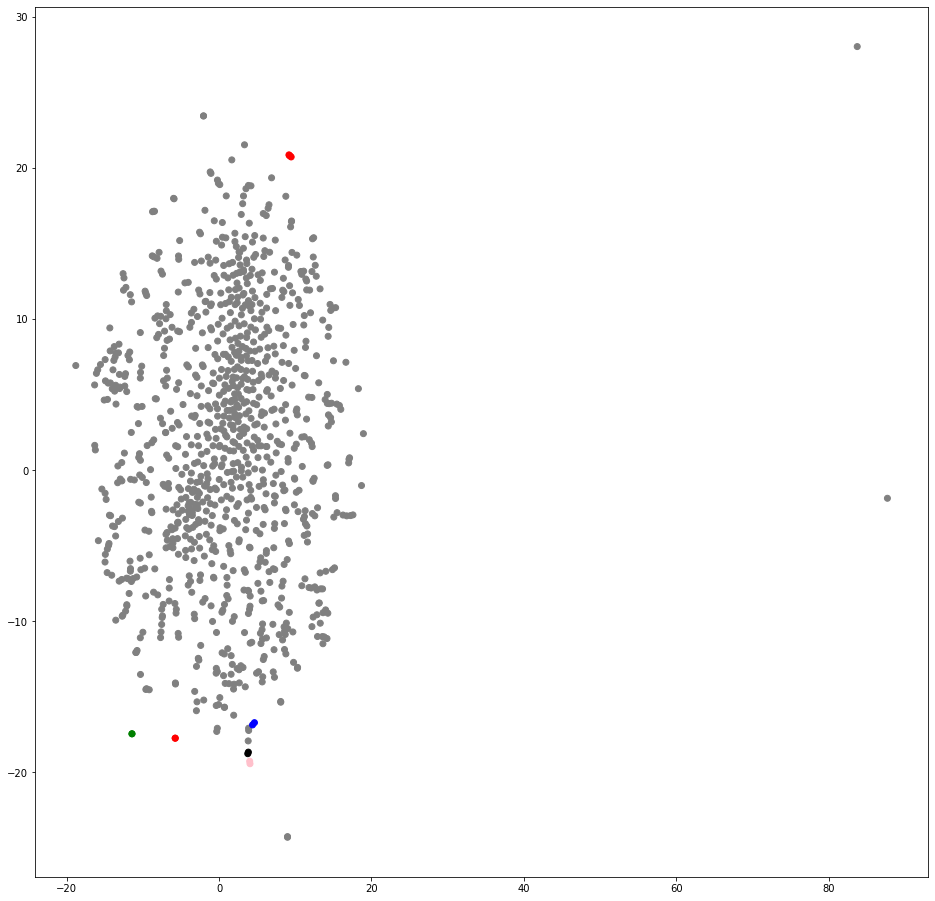

In [151]:
t = TSNE_(word2vec_100_dim, words2_vec_100)
plot_tsne(t)

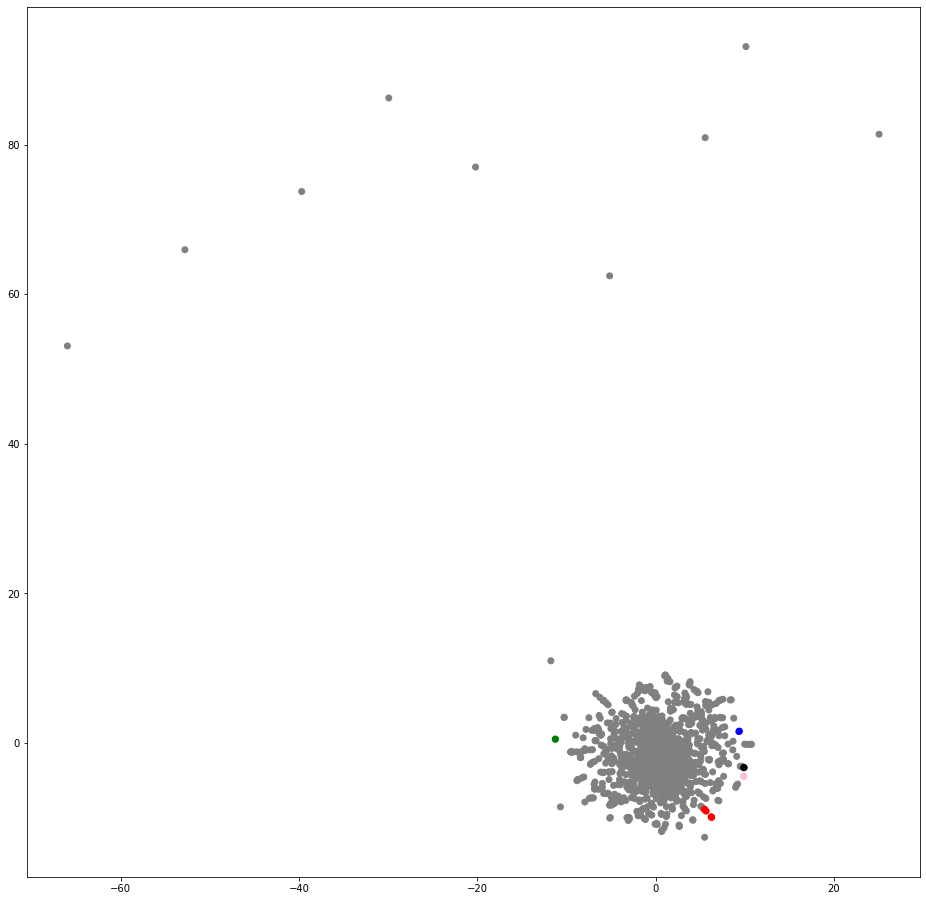

In [153]:
t2 = TSNE_(word2vec_300_dim, words2_vec_300)
plot_tsne(t2)

1. Zadanie 1 
* W zad 3 model 300-d performowałam trochę lepiej. Widoczne jest to dla słowa 'kpk', gdzie model 100-d znalazł niezwiązane słowa (np. "kilopond"), natomiast 300-d odszukał m.in "postępowania", stanowiące rozwiniecie skrótu. Dla innych słów zwrócone słowa były bardzo podobne.
* W zad 5 rozważaliśmy wyrażenia składające się z więcej, niż jednego słowa. Znowu oba modele zwróciły bardzo podobne wyniki. Dla 'kodeks cywilny' otrzymaliśmy słowa 'isps' (300-d), 'jōei' (300-d), 'pasztunwali' (100-d). Mimo roźnic, ciężko ocenić, który model dla tego przypadku sprawdził się lepiej, gdyż wszystkie wymienione słowa są w związane z kodeksem. 
* W zad 7 dla równania "pasażer + kobieta - mężczyzna" model 100-d zwrócił "taksówka", a model 300-d podróżny (pozostałe słowa się zgadzają). W pierwszym przypadku został zachowany rodzaj żeński, natomiast w drugim przypadku już nie. Oba słowa są dość związane z "pasażerem" w kontekście podróży. W tym wypadku, dzięki zachowaniu rodzaju można stwierdzić, że model 100-d poradził sobie lepiej. 
2. Zadanie 2 
* Dla pojedynczych słów znalezione podobne słowa są bliższe rzeczywistości, niż te dla wyrażeń MWEs. Dla MWEs znalezione słowa pokrywają się z pojedynczymi słowami tworzącymi te wyrażenia, choć pozostałe są w pewnien sposób związane z sensem wyrażenia. Ograniczeniem dla MWEs było to, że jako wyniki dostawaliśmy tylko pojedyczne słowa, a nie całe wyrażenia. Model niepoprawnie znalazł 'korzyść' jako bliską wyrażeniu 'szkoda majątkowa'.
3. Zadanie 3
* Poprawienie wyników mogłoby być związane m.in. ze zniesiem wspomnianego ograniczenia. Ciężko porównywać pojedyncze słowo do całego wyrażenia. Również zmiana reprezentacji wyrażenia np. zamiast średniej arytmetycznej wybranie średniej ważonej, gdy jedno ze słów dominuje w wyrażeniu, mogłaby okazać się pomocna. 
4. Zadanie 4
* Tak, przedstawienie znaczenia wyrażnia w postaci algebraicznej jest obarczone biasem. Wynik może zależeć np. w jaki sposób potraktujemy człon "-" (np. możemy przeskalować wektor, który chcemy odjąć, co może, bądź nie musi stanowić podkreślenie, że to słowo nie pasuje do reszty wyrażenia). Niemożliwym jest przełożenie semantyki wyrażenia w oparciu tylko o wyrażenia algebraiczne.
5. Zadanie 5
* Po podzieleniu wyróżnionych słów na jeszcze mniejsze kategorie np. słowa 1-6 związane ze 'szkoda' jako jedna kategoria, a "lekarz", "lekarka jako druga itd., widać, że dla modelu 300-d pierwsza kategoria jest razem sklastrowana, w przypadku modelu 100-d już nie. Modele spisały się dobrze klastrując ze sobą mniejsze kategorie (np. "pasażer", "pasażerka" lub "lekarz", "lekarka"). 